<a href="https://colab.research.google.com/github/hardikjain54/Vihaan/blob/main/Vihaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils


In [6]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("test.csv")

# New Section

In [7]:
def encode(train, test):
    label_encoder = LabelEncoder().fit(train.species)
    labels = label_encoder.transform(train.species)
    classes = list(label_encoder.classes_)

    train = train.drop(['species', 'id'], axis=1)
    test_ids=test.id
    test = test.drop('id', axis=1)

    return train, labels, test, classes,test_ids

In [8]:
train, labels, test, classes,test_ids = encode(train, test)


In [9]:
scaler = StandardScaler().fit(train.values)
scaled_train = scaler.transform(train.values)

In [10]:
sss = StratifiedShuffleSplit(test_size=0.3, random_state=20)
for train_index, valid_index in sss.split(scaled_train, labels):
    X_train, X_valid = scaled_train[train_index], scaled_train[valid_index]
    y_train, y_valid = labels[train_index], labels[valid_index]
    

In [11]:
nb_features = 64 # number of features per features type (shape, texture, margin)   
nb_class = len(classes)

In [12]:
# reshape train data
X_train_r = np.zeros((len(X_train), nb_features, 3))
X_train_r[:, :, 0] = X_train[:, :nb_features]
X_train_r[:, :, 1] = X_train[:, nb_features:128]
X_train_r[:, :, 2] = X_train[:, 128:]

# reshape validation data
X_valid_r = np.zeros((len(X_valid), nb_features, 3))
X_valid_r[:, :, 0] = X_valid[:, :nb_features]
X_valid_r[:, :, 1] = X_valid[:, nb_features:128]
X_valid_r[:, :, 2] = X_valid[:, 128:]

In [13]:
model = Sequential()
model.add(Convolution1D(512, 1, input_shape=(nb_features, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(nb_class))
model.add(Activation('softmax'))

In [14]:
y_train = np_utils.to_categorical(y_train, nb_class)
y_valid = np_utils.to_categorical(y_valid, nb_class)

sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

nb_epoch = 15
model.fit(X_train_r, y_train, epochs=nb_epoch, validation_data=(X_valid_r, y_valid), batch_size=16)

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


44/44 [==============================] - 34s 763ms/step - loss: 4.0722 - accuracy: 0.1602 - val_loss: 2.5293 - val_accuracy: 0.6162
Epoch 2/15
44/44 [==============================] - 36s 810ms/step - loss: 1.2056 - accuracy: 0.7388 - val_loss: 0.6053 - val_accuracy: 0.8653
Epoch 3/15
44/44 [==============================] - 36s 823ms/step - loss: 0.2491 - accuracy: 0.9567 - val_loss: 0.2983 - val_accuracy: 0.9091
Epoch 4/15
44/44 [==============================] - 34s 771ms/step - loss: 0.1102 - accuracy: 0.9784 - val_loss: 0.2339 - val_accuracy: 0.9360
Epoch 5/15
44/44 [==============================] - 43s 987ms/step - loss: 0.0993 - accuracy: 0.9798 - val_loss: 0.1512 - val_accuracy: 0.9630
Epoch 6/15
44/44 [==============================] - 33s 761ms/step - loss: 0.0261 - accuracy: 0.9942 - val_loss: 0.1868 - val_accuracy: 0.9495
Epoch 7/15
44/44 [==============================] - 35s 784ms/step - loss: 0.0275 - accuracy: 0.9942 - val_loss: 0.1167 - val_accuracy: 0.9630
Epoch 8/15

In [15]:
scaler = StandardScaler().fit(test.values)
scaled_test = scaler.transform(test.values)

In [16]:
test_dataset = np.zeros((len(scaled_test), nb_features, 3))
test_dataset[:, :, 0] = scaled_test[:, :nb_features]
test_dataset[:, :, 1] = scaled_test[:, nb_features:128]
test_dataset[:, :, 2] = scaled_test[:, 128:]

In [17]:
preds_test = model.predict(test_dataset)
preds_test

19/19 [==============================] - 2s 121ms/step


array([[1.7927454e-07, 3.2606701e-07, 6.4623817e-10, ..., 1.6253517e-10,
        4.0680034e-06, 1.3593596e-07],
       [2.7735496e-08, 3.2613713e-08, 3.2326491e-07, ..., 1.4150960e-06,
        4.0979833e-09, 4.7967660e-07],
       [4.2531903e-07, 9.9345934e-01, 3.0104566e-08, ..., 7.7618356e-10,
        2.1909483e-09, 1.6807920e-04],
       ...,
       [2.2113393e-06, 4.3576274e-06, 8.3517682e-09, ..., 2.2958464e-08,
        1.7566347e-07, 9.8998798e-06],
       [3.4253919e-10, 2.6509644e-10, 3.2781937e-08, ..., 1.3093781e-09,
        2.1055582e-10, 2.3683092e-10],
       [4.4897592e-09, 1.3784302e-07, 2.9847098e-07, ..., 8.1155882e-09,
        2.4875629e-08, 1.2015695e-05]], dtype=float32)

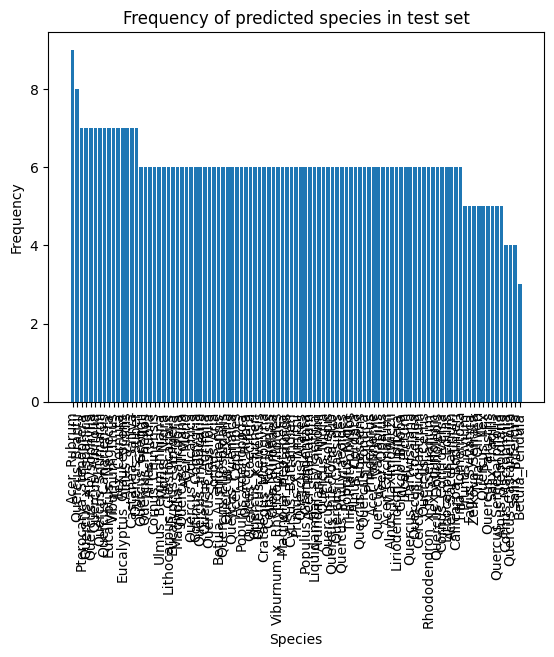

In [18]:
import matplotlib.pyplot as plt

# Convert the predicted labels back to species names
predicted_species = [classes[np.argmax(pred)] for pred in preds_test]

# Create a dataframe with the species frequencies
species_freq = pd.DataFrame({'species': predicted_species})
species_freq = species_freq['species'].value_counts().reset_index()

# Plot a bar graph of the species frequencies
plt.bar(species_freq['index'], species_freq['species'])
plt.title('Frequency of predicted species in test set')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

10/10 [==============================] - 1s 115ms/step


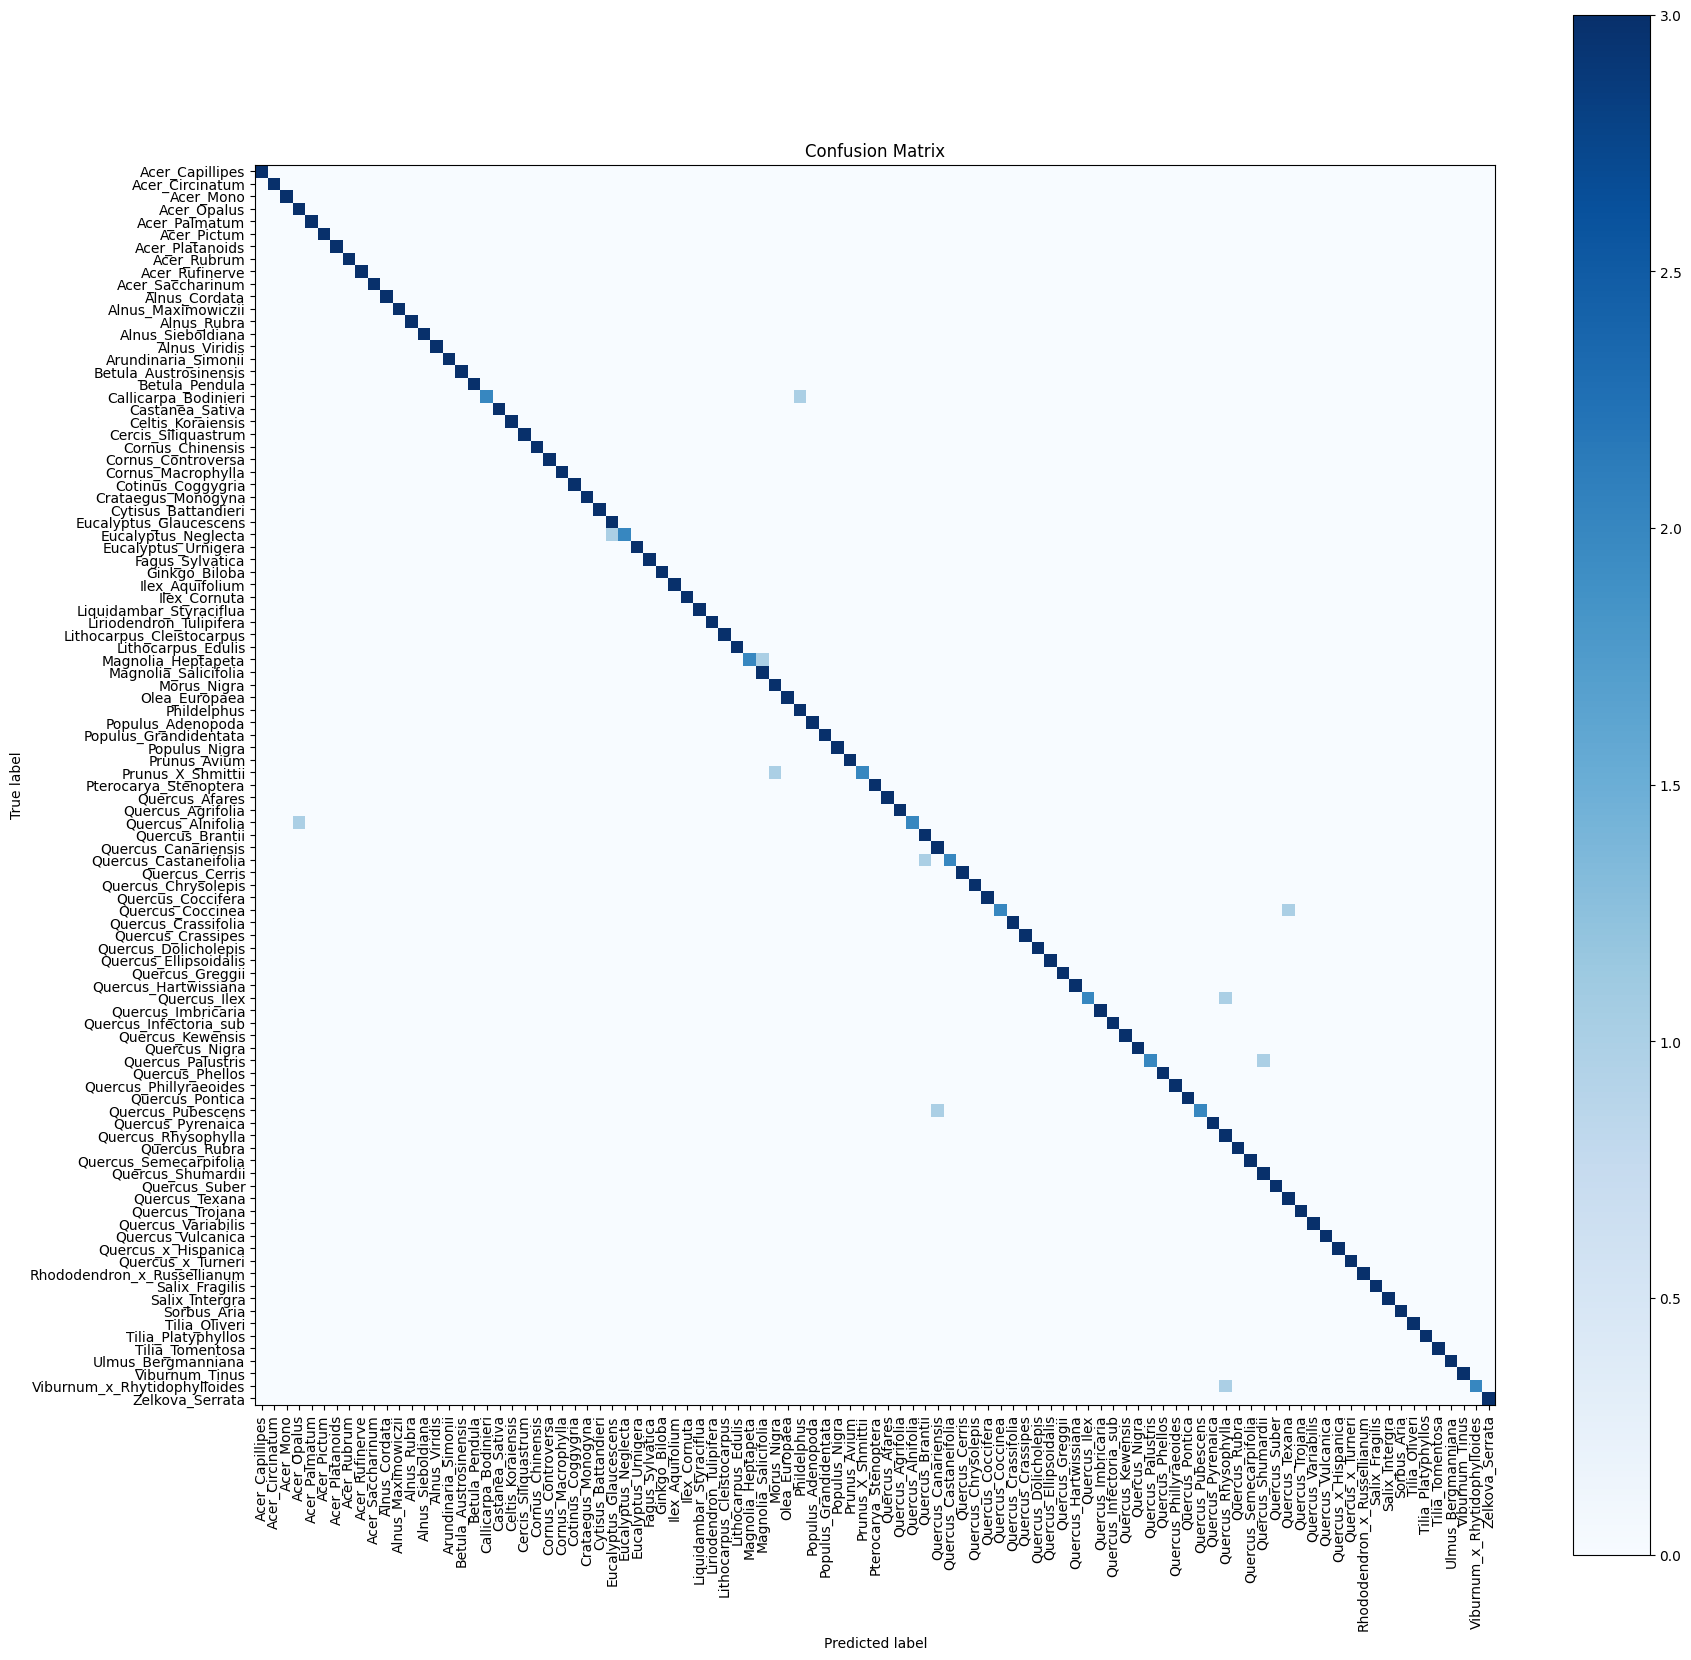

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict on validation set
pred_valid = model.predict(X_valid_r)
# Convert predictions to labels
pred_valid_labels = np.argmax(pred_valid, axis=1)
# Convert validation set labels to labels
valid_labels = np.argmax(y_valid, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(valid_labels, pred_valid_labels)

# Plot confusion matrix
plt.figure(figsize=(20,20))
plt.imshow(conf_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

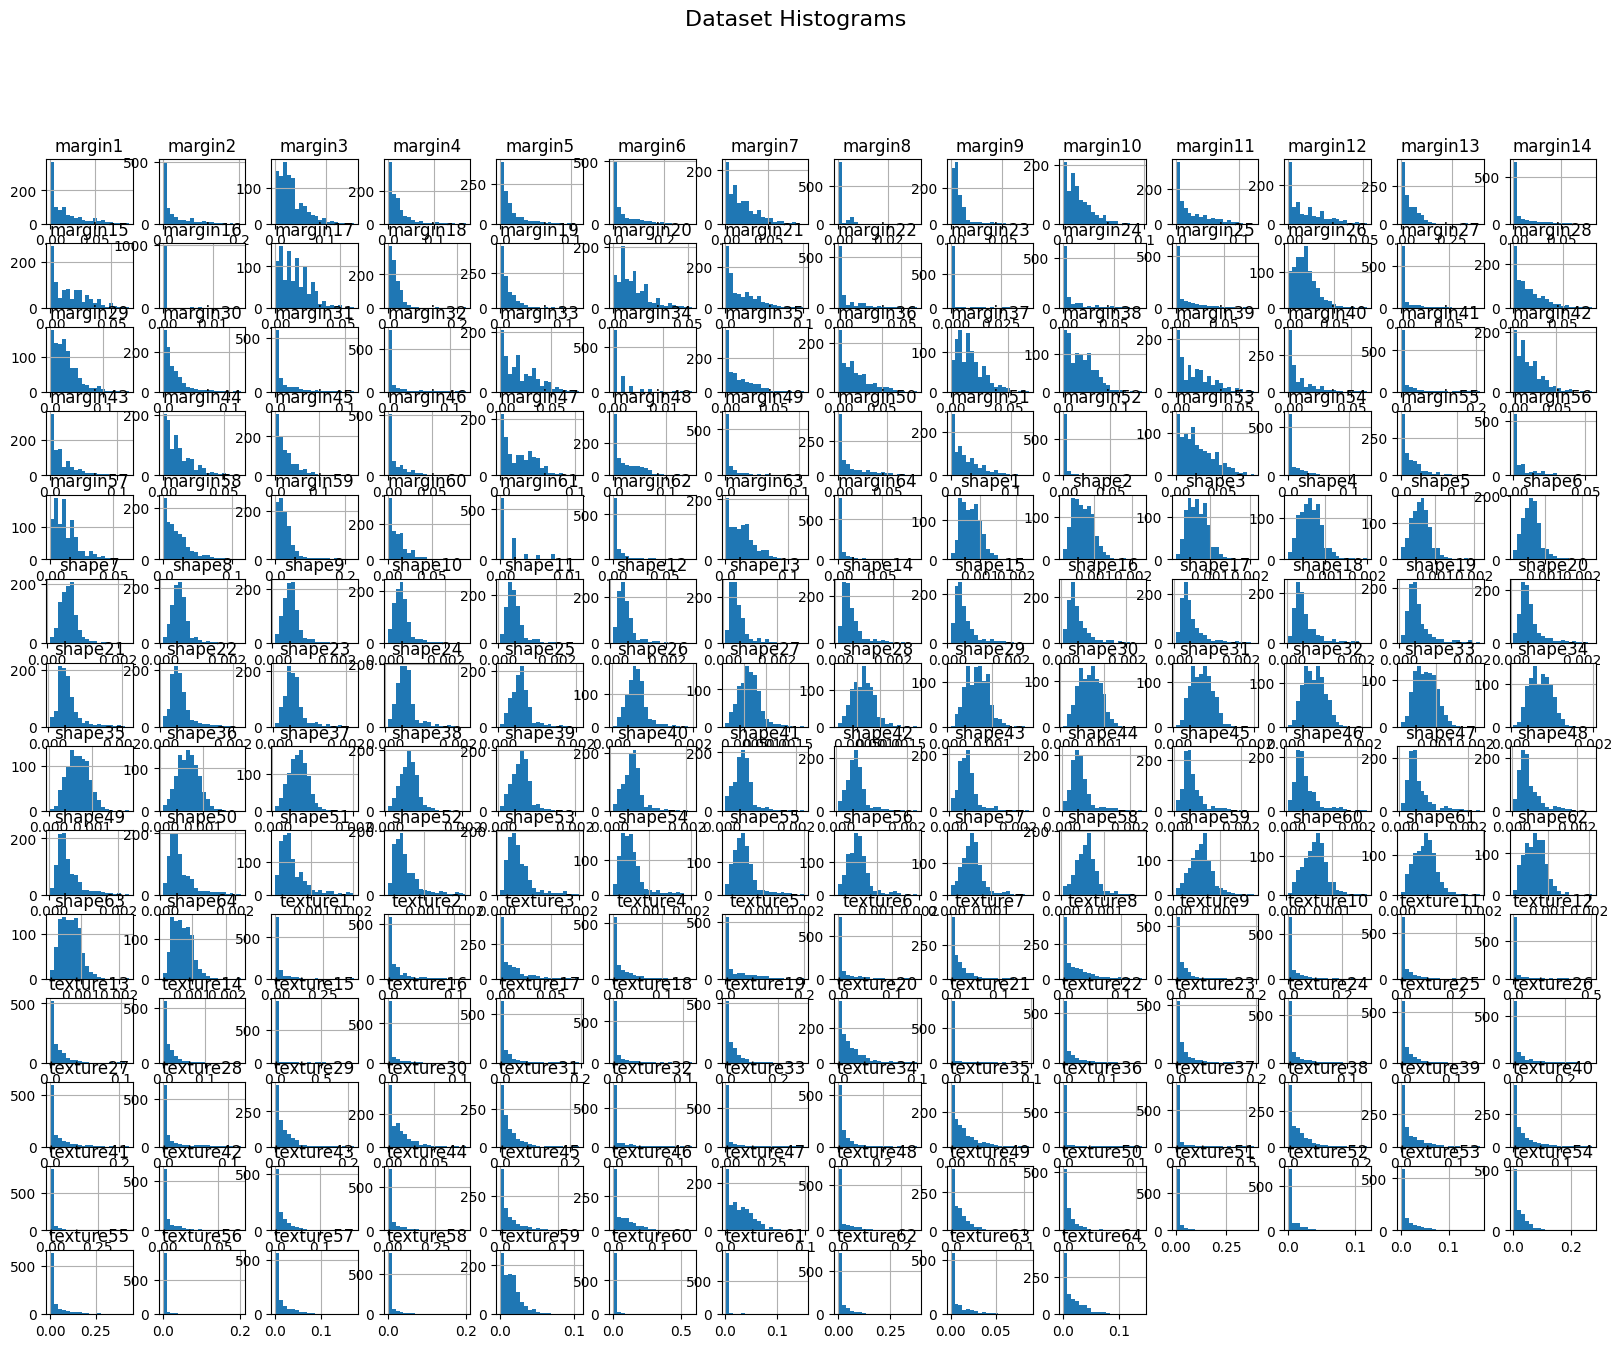

In [20]:
# Plot dataset histograms
train.hist(bins=20, figsize=(20,15))
plt.suptitle('Dataset Histograms', fontsize=16)
plt.show()

In [21]:
import pickle

with open('decision_tree.pkl', 'wb') as f:
    pickle.dump(model, f)

In [23]:
with open('decision_tree.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

AttributeError: ignored